In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("computers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
Units      14 non-null int64
Minutes    14 non-null int64
dtypes: int64(2)
memory usage: 304.0 bytes


In [3]:
class LinearRegressionUnivariate:
    
    def __init__(self):
        self.m = 0    # slope
        self.c = 0    # intercept
        self.score = None
        
    def fit_gd(self, X, Y, learning_rate = 0.01):
        """ Gradient descent implementation of linear regression """
        m = self.m
        c = self.c
        n = len(X)
        for i in range(5000):
            yhat = m*X + c
            error =  (1/n)*sum((Y-yhat)**2)
            dm = (-2/n)*sum(X*(Y - yhat))  # derivative of "error function" w.r.t m(Slope) 
            dc = (-2/n)*sum(Y-yhat)        # derivative of "error function" w.r.t c(intercept)
            m = m - learning_rate * dm 
            c = c - learning_rate * dc
            
            if i%1000==0:
                print("error : {}\tslope(m) = {}\tintercept(c) == {}".format(error,m,c))
            
        self.m = m
        self.c = c
        self.score = self.r_squared_score(X)
        
    def fit_ls(self, X, Y):
        """ least squares implementation of linear regression """
        n = len(X)
        numerator = sum(X*Y) - n*np.mean(X)*np.mean(Y)
        denominator = sum(X**2) - n*(np.mean(X)**2)
        m = numerator/denominator
        c = np.mean(Y) - m*np.mean(X)
        self.m = m
        self.c = c
        self.score = self.r_squared_score(X)
        
    def predict(self,X):
        """ Makes predictions for an list of values of X, inputs a list, outputs a numpy array """
        return np.array([self.m*x + self.c for x in X])

    def r_squared_score(self, X):
        y_hat = np.array([self.m*x + self.c for x in X])
        ss_r = sum((Y-y_hat)**2)         # sum of square regressor = summation(y-yhat)^2
        ss_t = sum((Y-np.mean(Y))**2)    # sum of square total = summation(y-y_mean)^2
        r_square = 1-(ss_r/ss_t)
        return r_square

In [4]:
clf = LinearRegressionUnivariate()

In [5]:
X = np.array(df["Units"])
Y = np.array(df["Minutes"])
clf.fit_gd(X,Y)
print("\nR squared score = {}".format(clf.score))

error : 11434.071428571428	slope(m) = 14.191428571428572	intercept(c) == 1.9442857142857142
error : 24.918264919439387	slope(m) = 15.516020445254272	intercept(c) == 4.108544563809838
error : 24.91774115000685	slope(m) = 15.508964382410223	intercept(c) == 4.160244043235595
error : 24.917740780783213	slope(m) = 15.508777039560217	intercept(c) == 4.161616696517412
error : 24.917740780522916	slope(m) = 15.508772065491215	intercept(c) == 4.161653141314401

R squared score = 0.9874371980620736


In [6]:
clf2 = LinearRegressionUnivariate()
clf2.fit_ls(X,Y)
print("R squared score = {}".format(clf.score))

R squared score = 0.9874371980620736


In [7]:
X_pred = [0,2,2,3,5,6,7,8,9,11]
y_pred = clf.predict(X_pred)

slope : 15.508771933439691 	intercept : 4.161654108850452


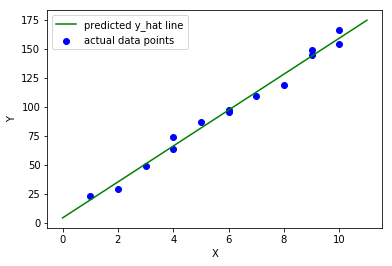

In [8]:
plt.scatter(X,Y, color = "blue", label = "actual data points")
plt.plot([min(X_pred), max(X_pred)], [min(y_pred), max(y_pred)], color = "green", label = "predicted y_hat line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
print("slope : {} \tintercept : {}".format(clf.m, clf.c))